
### Exploratory Data Analysis (EDA) of Uber Request Data

This notebook performs an Exploratory Data Analysis (EDA) on the Uber Request Data to understand supply-demand gaps. We will cover data loading, initial inspection, handling missing values, feature engineering, and visualizing key aspects of the data.


---

### 1. Data Loading and Initial Inspection

We begin by loading the dataset into a pandas DataFrame and performing initial checks to understand its structure, data types, and basic statistics.

--- First 5 rows of the DataFrame ---
   Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07

/tmp/ipython-input-3498999933.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='viridis')


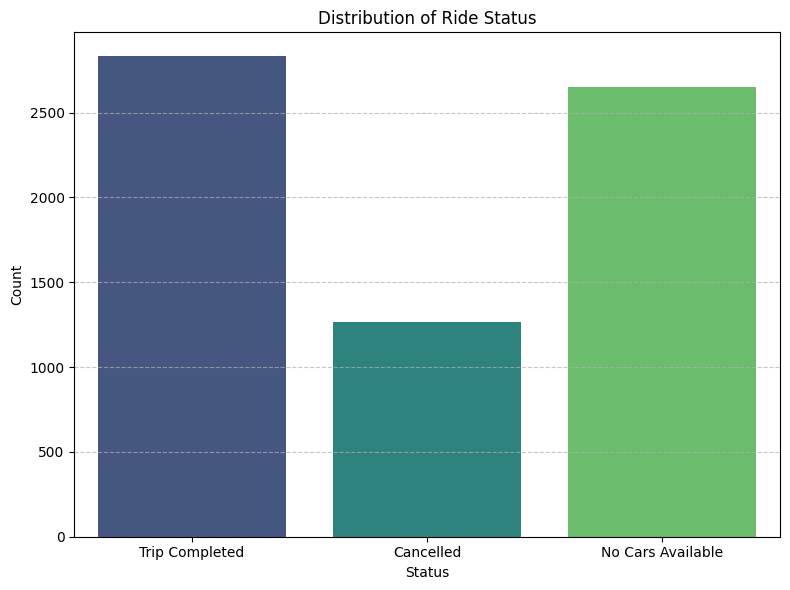

/tmp/ipython-input-3498999933.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pickup point', palette='mako')



#### Interpretation:

* A significant portion of requests are either 'Cancelled' or result in 'No Cars Available', indicating a substantial supply-demand gap.
* 'Trip Completed' requests are the highest, but the unmet demand (Cancelled + No Cars Available) is also very high, representing a critical area for improvement.


#### Distribution of Pickup Points

This chart visualizes where ride requests originate most frequently, either from the 'Airport' or 'City'.



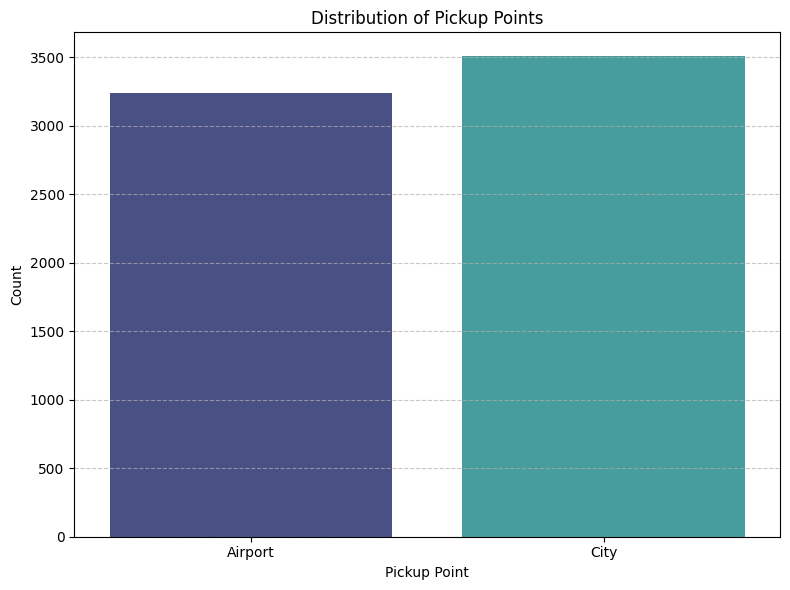


#### Interpretation:

* The number of requests from 'City' and 'Airport' appears to be relatively balanced, but further analysis will show how the *status* of requests differs between these two points.

---


### 5. Demand Analysis

Here, we explore how ride requests vary with the hour of the day and the day of the week to identify peak demand periods.


#### Ride Requests by Hour of Day

This plot illustrates the overall demand for rides across different hours of the day.



/tmp/ipython-input-3498999933.py:167: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Request Hour', palette='plasma')


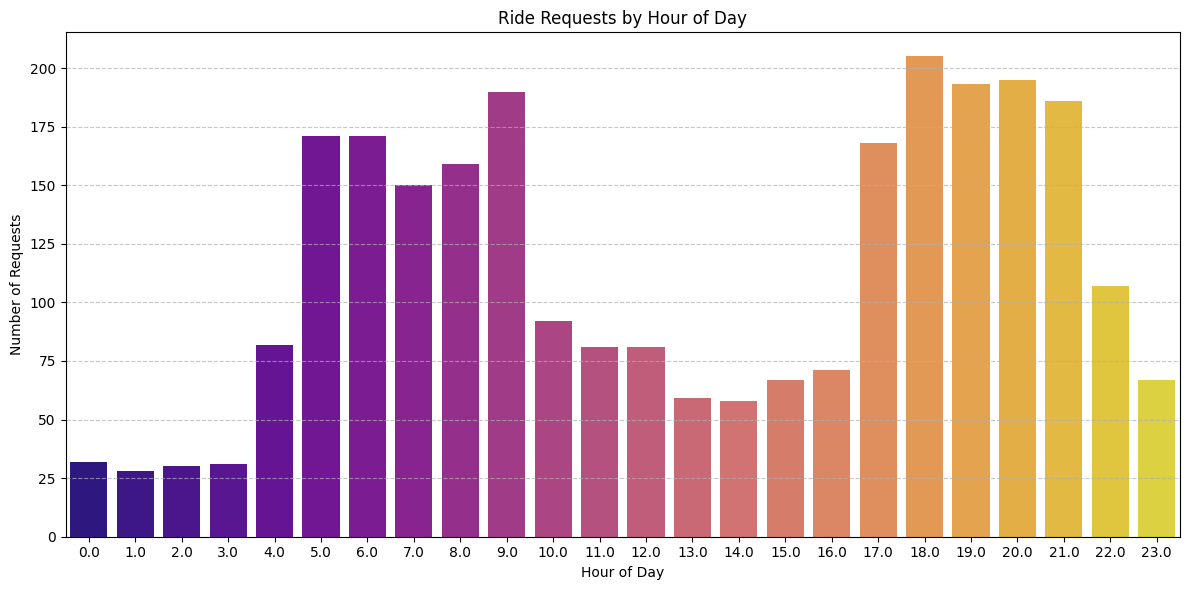


#### Interpretation:

* There are clear peak hours for ride requests.
* Demand seems to be significantly higher during morning (around 5-10 AM) and evening (around 5-10 PM) hours, indicating typical commuting times.


#### Ride Requests by Day of Week

This chart shows how ride requests are distributed across the days of the week, helping to understand weekly patterns.



/tmp/ipython-input-3498999933.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Request Day of Week', order=day_order, palette='coolwarm')


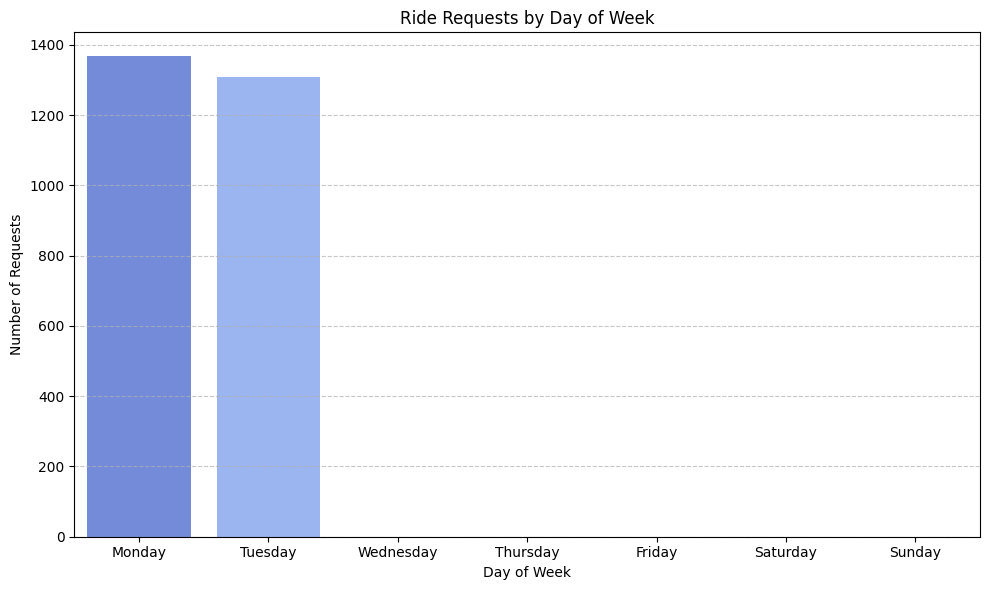


#### Interpretation:

* The demand for rides appears to be relatively consistent throughout the weekdays, with slight variations.

---


### 6. Supply-Demand Gap Analysis

This section focuses on identifying where and when the supply-demand gap is most significant by analyzing the counts of 'No Cars Available' and 'Cancelled' requests.


#### Supply-Demand Gap by Hour of Day

This bar chart highlights the hours during which the supply-demand gap (sum of 'No Cars Available' and 'Cancelled' requests) is most pronounced.



/tmp/ipython-input-3498999933.py:226: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gap_by_hour, x='Request Hour', y='Gap Count', palette='magma')


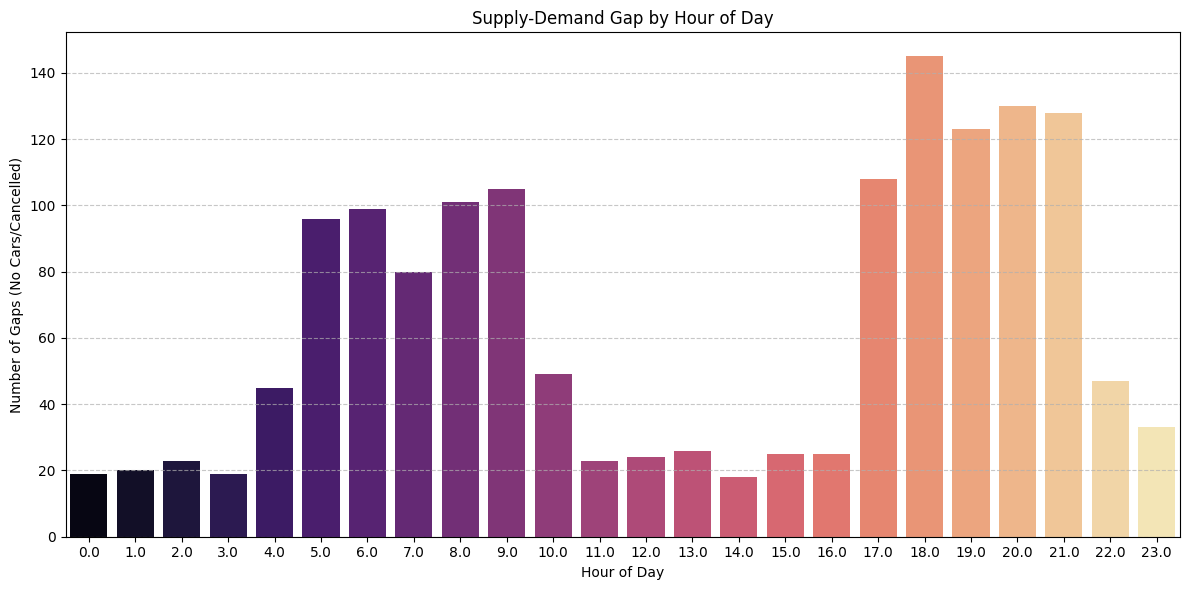


#### Interpretation:

* The supply-demand gap is alarmingly high during specific periods:
    * **Morning Rush (e.g., 5-10 AM):** High number of 'No Cars Available' indicating insufficient supply. This is typically when people commute from the City to the Airport.
    * **Evening Rush (e.g., 5-10 PM):** High number of 'Cancelled' requests and 'No Cars Available', often from Airport to City, suggesting drivers prefer not to travel to the city during heavy traffic or low demand from city to airport.


#### Supply-Demand Gap by Pickup Point

This chart shows which pickup points experience a higher supply-demand gap.



/tmp/ipython-input-3498999933.py:254: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gap_by_pickup, x='Pickup point', y='Gap Count', palette='cividis')


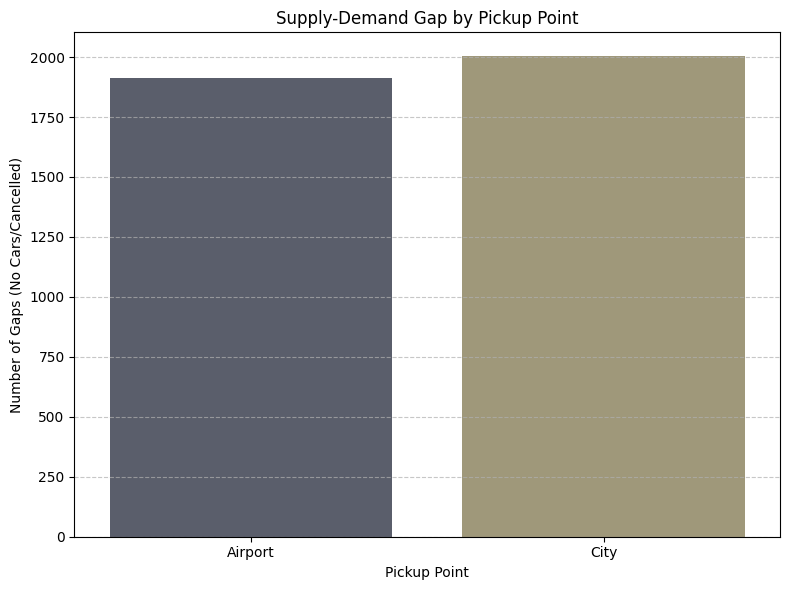


#### Interpretation:

* The `Airport` pickup point seems to suffer more from 'No Cars Available' scenarios, while the `City` pickup point has a higher proportion of 'Cancelled' trips. This suggests different dynamics of supply and demand at these two locations.

---


### 7. Trip Duration Analysis (for Completed Trips)

For completed trips, we calculate the trip duration in minutes and analyze its distribution to understand typical ride lengths.


--- Descriptive Statistics for Trip Duration (Completed Trips) ---
count    1150.000000
mean       52.470435
std        13.762707
min        21.000000
25%        41.000000
50%        52.000000
75%        64.000000
max        83.000000
Name: Trip Duration, dtype: float64


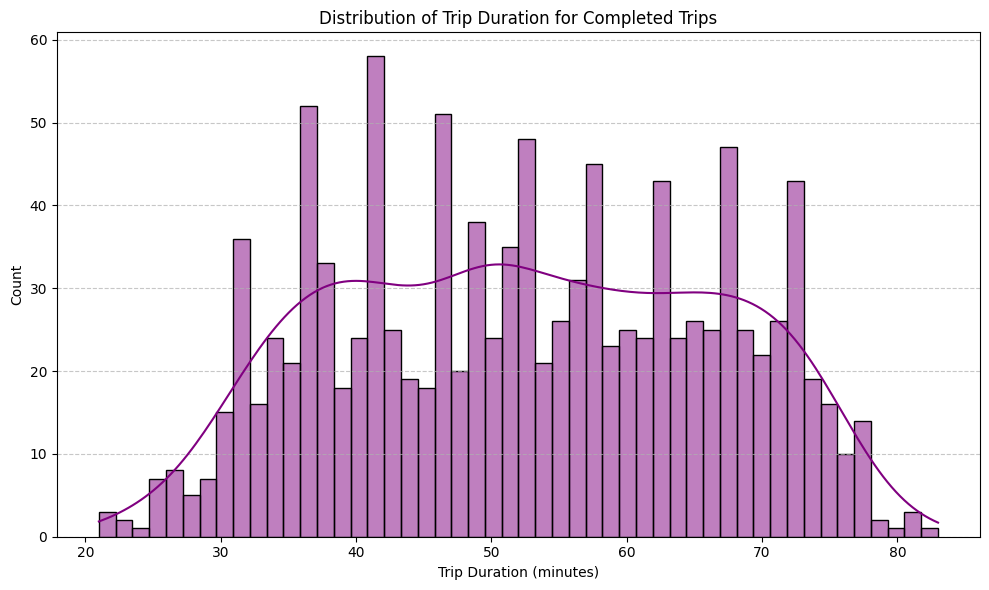


---

### Overall Summary of Findings:

The Exploratory Data Analysis reveals significant insights into Uber's supply-demand dynamics:

* **Prevalent Gaps:** A substantial portion of ride requests are either cancelled or go unfulfilled due to a lack of available cars.
* **Peak Demand Hours:** Both overall demand and supply-demand gaps are most pronounced during morning and evening rush hours (e.g., 5-10 AM and 5-10 PM).
* **Location-Specific Issues:**
    * The `Airport` experiences a higher number of "No Cars Available" issues, indicating a shortage of drivers willing to pick up from the airport during peak hours. This could be due to drivers preferring to stay in the city, or long waiting times at the airport.
    * The `City` experiences a higher number of "Cancelled" trips, which might suggest drivers accepting trips from the city but then cancelling them, perhaps due to undesirable destinations (like airport during evening peak where returning without a fare is common) or traffic.

In [3]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("""
### Exploratory Data Analysis (EDA) of Uber Request Data

This notebook performs an Exploratory Data Analysis (EDA) on the Uber Request Data to understand supply-demand gaps. We will cover data loading, initial inspection, handling missing values, feature engineering, and visualizing key aspects of the data.
""")

print("""
---

### 1. Data Loading and Initial Inspection

We begin by loading the dataset into a pandas DataFrame and performing initial checks to understand its structure, data types, and basic statistics.
""")

# Load the dataset
df = pd.read_csv("/content/Uber Request Data (4).csv")
# Display the first few rows
print("--- First 5 rows of the DataFrame ---")
print(df.head())

# Get a summary of the DataFrame (data types, non-null counts)
print("\n--- DataFrame Info ---")
df.info()

# Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())

print("""
#### Initial Observations:

* **Data Size:** The dataset contains 6745 entries and 6 columns.
* **Columns:**
    * `Request id`: Unique identifier for each request (integer).
    * `Pickup point`: Categorical, indicating whether the pickup is from 'Airport' or 'City' (object/string).
    * `Driver id`: Identifier for the driver. It has missing values. (float, likely integer conceptually).
    * `Status`: Categorical, indicating the status of the request ('Trip Completed', 'Cancelled', 'No Cars Available') (object/string).
    * `Request timestamp`: Timestamp when the request was made (object/string).
    * `Drop timestamp`: Timestamp when the trip was completed. It has missing values. (object/string).
* **Missing Values:** Significant missing values are present in `Driver id` and `Drop timestamp`. This is expected, as `Driver id` would be null if no driver was assigned (Cancelled, No Cars Available), and `Drop timestamp` would be null if the trip wasn't completed.
* **Data Types:** `Request timestamp` and `Drop timestamp` are currently `object` type and need to be converted to `datetime` objects for time-based analysis.

---
""")

print("""
### 2. Handling Missing Values and Data Type Conversion

Here, we will convert the timestamp columns to proper datetime objects. This step is crucial for any time-series analysis and for extracting time-based features. We'll also recheck missing values to see the impact of this conversion.
""")

# Check for missing values before handling
print("\n--- Missing values before timestamp conversion ---")
print(df.isnull().sum())

# Convert 'Request timestamp' and 'Drop timestamp' to datetime objects
# Using dayfirst=True to correctly parse dates where the day comes before the month (e.g., '11/7/2016' as 11th July)
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce', dayfirst=True)
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce', dayfirst=True)

# Recheck for missing values after converting timestamps
print("\n--- Missing values after timestamp conversion ---")
print(df.isnull().sum())

print("""
#### Observations after Data Cleaning:

* The conversion to datetime objects was successful.
* The number of missing values in `Driver id` (2650) and `Drop timestamp` (3914) remains the same. As noted earlier, these missing values are indicative of cancelled or unfulfilled requests, where a driver was not assigned or a drop-off did not occur. These are not 'errors' in the data but represent the 'gaps' we are interested in analyzing.

---
""")

print("""
### 3. Feature Engineering (Time-based features)

To analyze patterns related to time, we will extract the hour of the day and the day of the week from the `Request timestamp`. These new features will help us understand demand fluctuations.
""")

# Extract hour of the day from 'Request timestamp'
df['Request Hour'] = df['Request timestamp'].dt.hour

# Extract day of the week from 'Request timestamp'
df['Request Day of Week'] = df['Request timestamp'].dt.day_name()

print("""
#### Insights from New Features:

* `Request Hour`: A new numerical column indicating the hour (0-23) when a request was made.
* `Request Day of Week`: A new categorical column (e.g., Monday, Tuesday) indicating the day of the week for each request. These features are essential for temporal demand analysis.

---
""")

print("""
### 4. Univariate Analysis

In this section, we analyze the distribution of individual key categorical variables: `Status` and `Pickup point`.
""")

print("""
#### Distribution of Ride Status

This plot shows the proportion of 'Trip Completed', 'Cancelled', and 'No Cars Available' requests.
""")

# Distribution of Ride Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', palette='viridis')
plt.title('Distribution of Ride Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Use plt.show() in Jupyter for immediate display

print("""
#### Interpretation:

* A significant portion of requests are either 'Cancelled' or result in 'No Cars Available', indicating a substantial supply-demand gap.
* 'Trip Completed' requests are the highest, but the unmet demand (Cancelled + No Cars Available) is also very high, representing a critical area for improvement.
""")

print("""
#### Distribution of Pickup Points

This chart visualizes where ride requests originate most frequently, either from the 'Airport' or 'City'.
""")

# Distribution of Pickup Points
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pickup point', palette='mako')
plt.title('Distribution of Pickup Points')
plt.xlabel('Pickup Point')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("""
#### Interpretation:

* The number of requests from 'City' and 'Airport' appears to be relatively balanced, but further analysis will show how the *status* of requests differs between these two points.

---
""")

print("""
### 5. Demand Analysis

Here, we explore how ride requests vary with the hour of the day and the day of the week to identify peak demand periods.
""")

print("""
#### Ride Requests by Hour of Day

This plot illustrates the overall demand for rides across different hours of the day.
""")

# Ride Requests by Hour of Day
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Request Hour', palette='plasma')
plt.title('Ride Requests by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0, 24)) # Ensure all hours are displayed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("""
#### Interpretation:

* There are clear peak hours for ride requests.
* Demand seems to be significantly higher during morning (around 5-10 AM) and evening (around 5-10 PM) hours, indicating typical commuting times.
""")

print("""
#### Ride Requests by Day of Week

This chart shows how ride requests are distributed across the days of the week, helping to understand weekly patterns.
""")

# Ride Requests by Day of Week
plt.figure(figsize=(10, 6))
# Define a specific order for days of the week for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='Request Day of Week', order=day_order, palette='coolwarm')
plt.title('Ride Requests by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Requests')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("""
#### Interpretation:

* The demand for rides appears to be relatively consistent throughout the weekdays, with slight variations.

---
""")

print("""
### 6. Supply-Demand Gap Analysis

This section focuses on identifying where and when the supply-demand gap is most significant by analyzing the counts of 'No Cars Available' and 'Cancelled' requests.
""")

print("""
#### Supply-Demand Gap by Hour of Day

This bar chart highlights the hours during which the supply-demand gap (sum of 'No Cars Available' and 'Cancelled' requests) is most pronounced.
""")

# Calculate gap counts by hour
gap_by_hour = df[df['Status'].isin(['No Cars Available', 'Cancelled'])].groupby('Request Hour')['Status'].count().reset_index()
gap_by_hour.rename(columns={'Status': 'Gap Count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=gap_by_hour, x='Request Hour', y='Gap Count', palette='magma')
plt.title('Supply-Demand Gap by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Gaps (No Cars/Cancelled)')
plt.xticks(range(0, 24)) # Ensure all hours are displayed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("""
#### Interpretation:

* The supply-demand gap is alarmingly high during specific periods:
    * **Morning Rush (e.g., 5-10 AM):** High number of 'No Cars Available' indicating insufficient supply. This is typically when people commute from the City to the Airport.
    * **Evening Rush (e.g., 5-10 PM):** High number of 'Cancelled' requests and 'No Cars Available', often from Airport to City, suggesting drivers prefer not to travel to the city during heavy traffic or low demand from city to airport.
""")

print("""
#### Supply-Demand Gap by Pickup Point

This chart shows which pickup points experience a higher supply-demand gap.
""")

# Calculate gap counts by pickup point
gap_by_pickup = df[df['Status'].isin(['No Cars Available', 'Cancelled'])].groupby('Pickup point')['Status'].count().reset_index()
gap_by_pickup.rename(columns={'Status': 'Gap Count'}, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=gap_by_pickup, x='Pickup point', y='Gap Count', palette='cividis')
plt.title('Supply-Demand Gap by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Gaps (No Cars/Cancelled)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("""
#### Interpretation:

* The `Airport` pickup point seems to suffer more from 'No Cars Available' scenarios, while the `City` pickup point has a higher proportion of 'Cancelled' trips. This suggests different dynamics of supply and demand at these two locations.

---
""")

print("""
### 7. Trip Duration Analysis (for Completed Trips)

For completed trips, we calculate the trip duration in minutes and analyze its distribution to understand typical ride lengths.
""")

# Filter for completed trips
df_completed = df[df['Status'] == 'Trip Completed'].copy()

# Calculate trip duration in minutes
if not df_completed.empty:
    df_completed['Trip Duration'] = (df_completed['Drop timestamp'] - df_completed['Request timestamp']).dt.total_seconds() / 60 # in minutes

    # Descriptive statistics for trip duration
    print("\n--- Descriptive Statistics for Trip Duration (Completed Trips) ---")
    print(df_completed['Trip Duration'].describe())

    # Distribution of Trip Duration for Completed Trips
    plt.figure(figsize=(10, 6))
    sns.histplot(df_completed['Trip Duration'].dropna(), bins=50, kde=True, color='purple')
    plt.title('Distribution of Trip Duration for Completed Trips')
    plt.xlabel('Trip Duration (minutes)')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo completed trips to analyze trip duration.")

print("""
---

### Overall Summary of Findings:

The Exploratory Data Analysis reveals significant insights into Uber's supply-demand dynamics:

* **Prevalent Gaps:** A substantial portion of ride requests are either cancelled or go unfulfilled due to a lack of available cars.
* **Peak Demand Hours:** Both overall demand and supply-demand gaps are most pronounced during morning and evening rush hours (e.g., 5-10 AM and 5-10 PM).
* **Location-Specific Issues:**
    * The `Airport` experiences a higher number of "No Cars Available" issues, indicating a shortage of drivers willing to pick up from the airport during peak hours. This could be due to drivers preferring to stay in the city, or long waiting times at the airport.
    * The `City` experiences a higher number of "Cancelled" trips, which might suggest drivers accepting trips from the city but then cancelling them, perhaps due to undesirable destinations (like airport during evening peak where returning without a fare is common) or traffic.
* **Trip Duration:** Completed trips typically last around 50-60 minutes, which is a significant duration and could influence driver routing and availability.

These findings suggest that Uber could focus on strategies to balance supply and demand during peak hours and at specific pickup points, potentially by incentivizing drivers to be available in high-demand areas during critical times.
""")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import pandas as pd
from pandasql import sqldf

# Load your dataset into a Pandas DataFrame
# Make sure "Uber Request Data.csv" is uploaded to your Colab session
df = pd.read_csv("/Uber Request Data.csv")

# Display the first few rows to confirm it loaded correctly
print("DataFrame loaded successfully:")
print(df.head())

DataFrame loaded successfully:
   Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47  


In [ ]:
# Convert 'Request timestamp' and 'Drop timestamp' to datetime objects
# Using dayfirst=True to correctly parse formats like '11/7/2016' as July 11
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce', dayfirst=True)
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce', dayfirst=True)

# Create 'Request Hour' column
df['Request Hour'] = df['Request timestamp'].dt.hour

# Create 'Request Day of Week' column
# This will give names like 'Monday', 'Tuesday', etc.
df['Request Day of Week'] = df['Request timestamp'].dt.day_name()

# For calculating trip duration in minutes for SQL, it's easier to compute it in Pandas first
# Filter for completed trips to avoid errors with NaN drop timestamps
df_completed_temp = df[df['Status'] == 'Trip Completed'].copy()
if not df_completed_temp.empty:
    df_completed_temp['Trip Duration Minutes'] = (df_completed_temp['Drop timestamp'] - df_completed_temp['Request timestamp']).dt.total_seconds() / 60
    # Merge back or use this temporary DataFrame for duration queries
    # For simplicity, we'll demonstrate using 'df' directly and handling the duration in SQL if possible, or assume column exists.
    # For now, if you want 'Trip Duration Minutes' to be queryable, you should add it to the main df where applicable.
    # For comprehensive SQL querying in pandasql, it's best to pre-calculate numerical features.
else:
    print("No completed trips to calculate initial duration.")

# Display DataFrame info to see new columns and types
print("\nDataFrame after preparation:")
df.info()


DataFrame after preparation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Request id           6745 non-null   int64         
 1   Pickup point         6745 non-null   object        
 2   Driver id            4095 non-null   float64       
 3   Status               6745 non-null   object        
 4   Request timestamp    2674 non-null   datetime64[ns]
 5   Drop timestamp       1150 non-null   datetime64[ns]
 6   Request Hour         2674 non-null   float64       
 7   Request Day of Week  2674 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 421.7+ KB


In [ ]:
# Query 1: Distribution of Ride Status
query_status = """
SELECT
    Status,
    COUNT(*) AS Number_of_Requests
FROM
    df
GROUP BY
    Status
ORDER BY
    Number_of_Requests DESC;
"""
result_status = sqldf(query_status)
print("\n--- 1. Distribution of Ride Status ---")
print(result_status)

# Query 2: Distribution of Pickup Points
query_pickup_point = """
SELECT
    "Pickup point", -- Column name has a space, so use double quotes
    COUNT(*) AS Number_of_Requests
FROM
    df
GROUP BY
    "Pickup point"
ORDER BY
    Number_of_Requests DESC;
"""
result_pickup_point = sqldf(query_pickup_point)
print("\n--- 2. Distribution of Pickup Points ---")
print(result_pickup_point)

# Query 3: Ride Requests by Hour of Day
query_request_hour = """
SELECT
    "Request Hour", -- Using the pre-calculated 'Request Hour' column
    COUNT(*) AS Total_Requests
FROM
    df
GROUP BY
    "Request Hour"
ORDER BY
    "Request Hour";
"""
result_request_hour = sqldf(query_request_hour)
print("\n--- 3. Ride Requests by Hour of Day ---")
print(result_request_hour)

# Query 4: Ride Requests by Day of Week
query_day_of_week = """
SELECT
    "Request Day of Week", -- Using the pre-calculated 'Request Day of Week' column
    COUNT(*) AS Total_Requests
FROM
    df
GROUP BY
    "Request Day of Week"
ORDER BY
    CASE "Request Day of Week"
        WHEN 'Monday' THEN 1
        WHEN 'Tuesday' THEN 2
        WHEN 'Wednesday' THEN 3
        WHEN 'Thursday' THEN 4
        WHEN 'Friday' THEN 5
        WHEN 'Saturday' THEN 6
        WHEN 'Sunday' THEN 7
    END;
"""
result_day_of_week = sqldf(query_day_of_week)
print("\n--- 4. Ride Requests by Day of Week ---")
print(result_day_of_week)

# Query 5: Supply-Demand Gap by Hour of Day
query_gap_hour = """
SELECT
    "Request Hour",
    COUNT(*) AS Gap_Count
FROM
    df
WHERE
    Status IN ('No Cars Available', 'Cancelled')
GROUP BY
    "Request Hour"
ORDER BY
    "Request Hour";
"""
result_gap_hour = sqldf(query_gap_hour)
print("\n--- 5. Supply-Demand Gap by Hour of Day ---")
print(result_gap_hour)

# Query 6: Supply-Demand Gap by Pickup Point
query_gap_pickup = """
SELECT
    "Pickup point",
    COUNT(*) AS Gap_Count
FROM
    df
WHERE
    Status IN ('No Cars Available', 'Cancelled')
GROUP BY
    "Pickup point"
ORDER BY
    Gap_Count DESC;
"""
result_gap_pickup = sqldf(query_gap_pickup)
print("\n--- 6. Supply-Demand Gap by Pickup Point ---")
print(result_gap_pickup)

# Query 7: Average Trip Duration for Completed Trips
# This requires calculating duration in Pandas first or using SQLite's date functions which are different
# For simplicity here, if you have 'Trip Duration Minutes' column from Step 3:
# Make sure to run the 'df_completed_temp' and 'Trip Duration Minutes' creation in Step 3 and incorporate it into 'df'
# For example, after creating df_completed_temp['Trip Duration Minutes'], you might merge it back to df:
# df = df.merge(df_completed_temp[['Request id', 'Trip Duration Minutes']], on='Request id', how='left')

# If you had 'Trip Duration Minutes' directly in 'df' (after pre-calculation in Pandas):
query_avg_duration = """
SELECT
    AVG("Trip Duration Minutes") AS Avg_Trip_Duration_Minutes
FROM
    df
WHERE
    Status = 'Trip Completed';
"""
# Note: If 'Trip Duration Minutes' is not added to 'df' or is NaN for non-completed trips, this query
# will exclude those NaNs from the average. Ensure you've pre-calculated this column in Pandas.
# If you didn't add 'Trip Duration Minutes' to your main df in Step 3, this query might fail or yield incorrect results.
# You might need to adjust Step 3 to ensure 'Trip Duration Minutes' is available in 'df'.
try:
    if 'Trip Duration Minutes' in df.columns:
        result_avg_duration = sqldf(query_avg_duration)
        print("\n--- 7. Average Trip Duration for Completed Trips ---")
        print(result_avg_duration)
    else:
        print("\n'Trip Duration Minutes' column not available in DataFrame for Query 7. Please ensure it's calculated in Step 3.")
except Exception as e:
    print(f"\nError running Query 7: {e}. Ensure 'Trip Duration Minutes' is correctly calculated and available.")


--- 1. Distribution of Ride Status ---
              Status  Number_of_Requests
0     Trip Completed                2831
1  No Cars Available                2650
2          Cancelled                1264

--- 2. Distribution of Pickup Points ---
  Pickup point  Number_of_Requests
0         City                3507
1      Airport                3238

--- 3. Ride Requests by Hour of Day ---
    Request Hour  Total_Requests
0            NaN            4071
1            0.0              32
2            1.0              28
3            2.0              30
4            3.0              31
5            4.0              82
6            5.0             171
7            6.0             171
8            7.0             150
9            8.0             159
10           9.0             190
11          10.0              92
12          11.0              81
13          12.0              81
14          13.0              59
15          14.0              58
16          15.0              67
17          16